# Building a model that classifies the side effects of a drug

In [2]:
#Importing the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset to the python environment
data=pd.read_csv("drugdata.csv")

In [4]:
data.head()
##checking whether the dataset is loaded properly

,Name,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sides,UsefulCount,Sex
0,Adelaide,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,"Drowsiness, dizziness , dry mouth /nose/thro...",0,F
1,Adelaide,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,"Drowsiness, dizziness , dry mouth /nose/thro...",1,F
2,Adelaide,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,,0,F
3,Adelaide,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,,0,F
4,Adelaide,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,,1,F


In [5]:
data.shape
##checking the shape of the dataset

(362806, 13)

In [6]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Age            362806 non-null  object
 2   Condition      362806 non-null  object
 3   Date           362806 non-null  object
 4   Drug           362806 non-null  object
 5   DrugId         362806 non-null  int64 
 6   EaseofUse      362806 non-null  int64 
 7   Effectiveness  362806 non-null  int64 
 8   Reviews        362769 non-null  object
 9   Satisfaction   362806 non-null  int64 
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Sex            362806 non-null  object
dtypes: int64(5), object(8)
memory usage: 36.0+ MB


In [7]:
data.columns
##getting the columns of the dataset

Index(['Name', 'Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sides', 'UsefulCount',
       'Sex'],
      dtype='object')

## Data Pre-processing

In [8]:
data.isna().sum()
##Checking for any null values present in the dataset 

Name              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sides             0
UsefulCount       0
Sex               0
dtype: int64

In [9]:
data.Reviews.nunique()

250159

In [10]:
#Since Reviews is having more than half of the values as unique we can neglect this column.
data.drop("Reviews",axis=1,inplace=True) 

In [11]:
data.isna().sum()

Name             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sides            0
UsefulCount      0
Sex              0
dtype: int64

null values have been removed

In [12]:
# check for categorical attributes

cat_col = []
for x in data:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Name', 'Age', 'Condition', 'Date', 'Drug', 'Sides', 'Sex']

In [13]:
data.Drug.nunique()

7093

In [14]:
data['Drug'].value_counts()

cymbalta                                            4648
lisinopril solution                                 4269
lisinopril                                          4269
lexapro                                             4134
hydrocodone-acetaminophen                           3944
                                                    ... 
prenatal vit #33-iron-fa-dha combination package       1
novolog cartridge                                      1
turpentine liquid                                      1
sucrose crystals                                       1
antacid plus anti-gas                                  1
Name: Drug, Length: 7093, dtype: int64

## We are selecting the dataset of drug named 'cymbalta' with DrugId =91491 .Because it is having the most occurences.

In [15]:
data=data.drop(data.loc[(data['Drug']!='cymbalta')].index)

In [16]:
data.shape

(4648, 12)

now we have got only 4648 rows.

In [17]:
data.head()

,Name,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sides,UsefulCount,Sex
314212,Gabriel,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,5,"Nausea , dry mouth , constipation , loss of ...",12,M
314216,Gabriel,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,1,"Nausea , dry mouth , constipation , loss of ...",0,M
314223,Gabriel,45-54,Anxiousness associated with Depression,01-04-2020,cymbalta,91491,5,5,5,"Nausea , dry mouth , constipation , loss of ...",0,M
314235,Gabriel,35-44,Anxiousness associated with Depression,12-06-2019,cymbalta,91491,3,3,2,"Nausea , dry mouth , constipation , loss of ...",0,M
314246,Gabriel,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,2,"Nausea , dry mouth , constipation , loss of ...",1,M


In [18]:
data.Sides.nunique()

1

In [19]:
data['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4648
Name: Sides, dtype: int64

In [20]:
data['Satisfaction'].value_counts()

1    1490
5    1268
4     852
3     646
2     392
Name: Satisfaction, dtype: int64

In [21]:
data['UsefulCount'].unique()

array([ 12,   0,   1,   2,  11,  22,   3,  15,  27,  30,   4,   5,  19,
        28,  21,  36,  35,  34,  25,   8,   7,  18,  39,   9,  56,  29,
        71,  23,   6,  32,  24,  17,  13,  14,  10,  16,  20,  42, 103,
        38,  33,  26,  61,  41,  93,  90, 134, 145,  51,  43,  48,  31,
        82,  58,  46,  47,  45,  44,  60,  50, 116,  40,  65,  97,  77,
       129,  68,  59,  37], dtype=int64)

In [22]:
data['Date'].nunique()

2189

In [23]:
data['EaseofUse'].value_counts()

5    2502
4     998
3     484
1     476
2     188
Name: EaseofUse, dtype: int64

Here we can drop the columns of Drug,Drug id ,sides because it is common. The other columns such as date can also be dropped. the column Name can also be dropped ,since name doesnt deal with the side effects of a drug.

In [24]:
data=data.drop(['Date','Drug','DrugId','Sides','Name'],axis=1)

In [25]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
314212,,Major Depressive Disorder,5,5,5,12,M
314216,45-54,Repeated Episodes of Anxiety,3,1,1,0,M
314223,45-54,Anxiousness associated with Depression,5,5,5,0,M
314235,35-44,Anxiousness associated with Depression,3,3,2,0,M
314246,55-64,Chronic Muscle or Bone Pain,2,2,2,1,M


In [26]:
data.isna().sum()

Age              0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Sex              0
dtype: int64

### Finding missing values

In [27]:
data['Age'].value_counts()
#there is a blank space ,so we can fill it with a value 3-6
# change the value 07 - Dec to 7-12

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
               118
75 or over     102
13-18           34
07-Dec           1
0-2              1
Name: Age, dtype: int64

In [28]:
data['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)
data['Age'].replace(to_replace = ['07-Dec'], value = '7-12', inplace = True)
data['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
3-6            118
75 or over     102
13-18           34
0-2              1
7-12             1
Name: Age, dtype: int64

## Correlation Matrix

<AxesSubplot:>

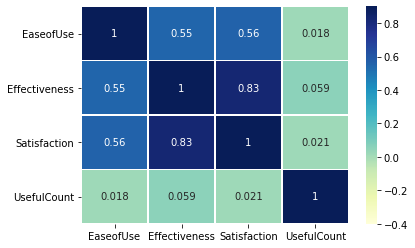

In [29]:
#CHECKING CORRELATION
corrmatrix = data.corr()

sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

HIGH LEVEL OF CORRELATION IS SEEN WITH EFFECTIVENESS AND SATISFACTION IN THE GRAPH

In [30]:
data_cpy =data

## CHECKING FOR OUTLIERS

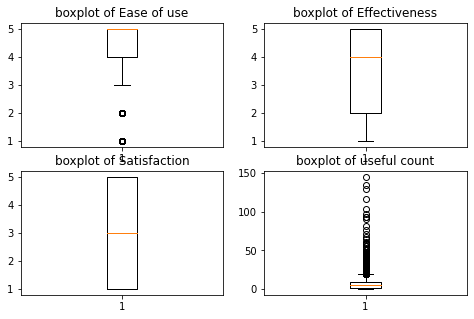

In [31]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.boxplot(data["EaseofUse"])
plt.title("boxplot of Ease of use")

plt.subplot(2,2,2)
plt.boxplot(data["Effectiveness"])
plt.title("boxplot of Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data["Satisfaction"])
plt.title("boxplot of Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data["UsefulCount"])
plt.title("boxplot of useful count")
plt.show()

There are outliers in useful count and ease of use

In [32]:
Q1=np.percentile(data["UsefulCount"],25,interpolation="midpoint")
Q3=np.percentile(data["UsefulCount"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= -8.5
upperlimit =  19.5


In [33]:
outlier = []
for x in data['UsefulCount']:
    if((x>upper)or(x<low)):
        outlier.append(x)

In [34]:
data=data.drop(data.loc[data["UsefulCount"]>upper].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c68f1c820>,
 'caps': [<matplotlib.lines.Line2D at 0x23c68f1cee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c68f1c4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c68f295e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c68f29940>],
 'means': []}

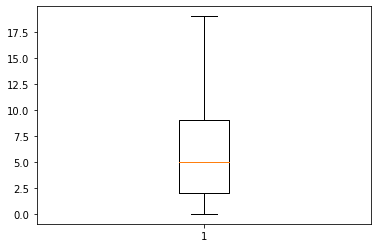

In [35]:
plt.boxplot(data["UsefulCount"])

Now the outliers in Useful Count is removed.

In [36]:
Q1=np.percentile(data["EaseofUse"],25,interpolation="midpoint")
Q3=np.percentile(data["EaseofUse"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= 2.5
upperlimit =  6.5


In [37]:
outlier = []
for x in data['EaseofUse']:
    if((x>upper)or(x<low)):
        outlier.append(x)

In [38]:
data=data.drop(data.loc[data["EaseofUse"]>upper].index)
data=data.drop(data.loc[data["EaseofUse"]<low].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c68f7dca0>,
 'caps': [<matplotlib.lines.Line2D at 0x23c68f893a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c68f7d940>],
 'medians': [<matplotlib.lines.Line2D at 0x23c68f89a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c68f89dc0>],
 'means': []}

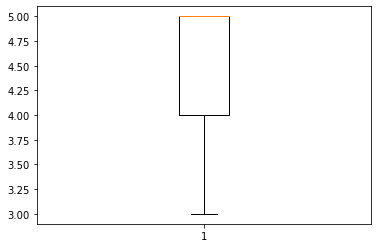

In [39]:
plt.boxplot(data["EaseofUse"])

Now we have removed all the outliers from the columns useful count and ease of use

In [40]:
data_cpy.shape

(4648, 7)

In [41]:
#adding index column
list2=list(range(3769))
data=data.set_index([list2])

list3 = list(range(4648))
data_cpy=data_cpy.set_index([list3])

In [42]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,5,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,1,1,0,M
2,45-54,Anxiousness associated with Depression,5,5,5,0,M
3,35-44,Anxiousness associated with Depression,3,3,2,0,M
4,55-64,Anxiousness associated with Depression,3,3,1,1,M


In [43]:
data_cpy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,5,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,1,1,0,M
2,45-54,Anxiousness associated with Depression,5,5,5,0,M
3,35-44,Anxiousness associated with Depression,3,3,2,0,M
4,55-64,Chronic Muscle or Bone Pain,2,2,2,1,M


## Recoding the values of Effectiveness to a categorical values.

In [44]:
data['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [45]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,no side effects,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,0,M
2,45-54,Anxiousness associated with Depression,5,no side effects,5,0,M
3,35-44,Anxiousness associated with Depression,3,moderate side effects,2,0,M
4,55-64,Anxiousness associated with Depression,3,moderate side effects,1,1,M


In [46]:
data_cpy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,3-6,Major Depressive Disorder,5,no side effects,5,12,M
1,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,0,M
2,45-54,Anxiousness associated with Depression,5,no side effects,5,0,M
3,35-44,Anxiousness associated with Depression,3,moderate side effects,2,0,M
4,55-64,Chronic Muscle or Bone Pain,2,severe side effects,2,1,M


# VISUALIZATION

## Catplot of Satisfaction with respect to Sex column

<Figure size 1080x1440 with 0 Axes>

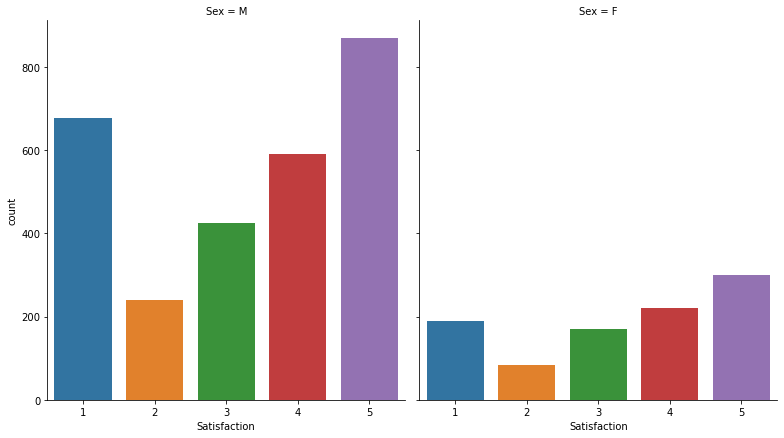

In [47]:
plt.figure(figsize=(15,20))
g = sns.catplot(x="Satisfaction",col="Sex",
                data=data, kind="count",
                height=6,aspect =.9);

## Pie chart of Percentage of Effectiveness.

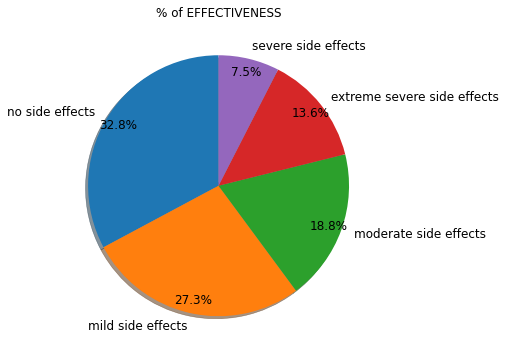

In [48]:
plt.figure(figsize=(10,6))
plt.title('% of EFFECTIVENESS')
tr = pd.DataFrame(data['Effectiveness'].value_counts())
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)

plt.show()

## Pie Chart of Percentage of different conditions of People

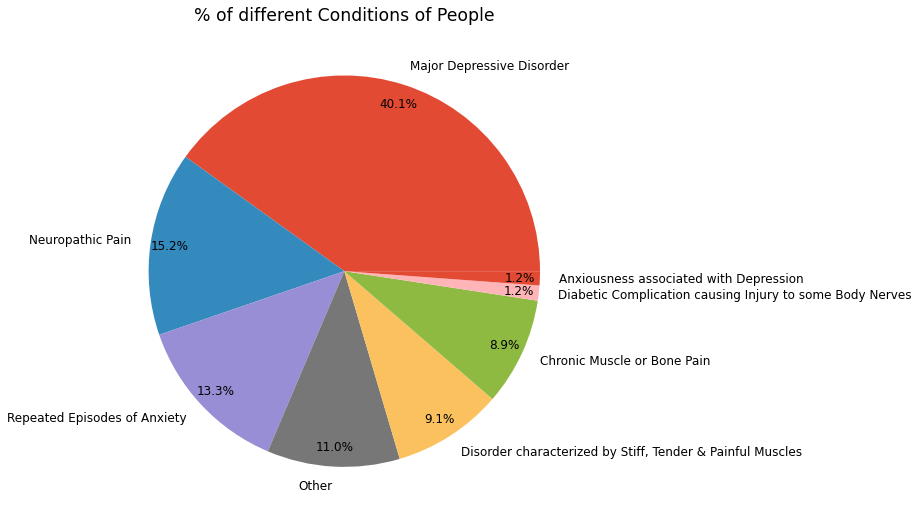

In [49]:
plt.figure(figsize=(15,9))
plt.title('% of different Conditions of People')
tr = pd.DataFrame(data['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)

plt.show()

## Count plot of various Age groups taken for this and their sex is displayed below.

<module 'matplotlib.pyplot' from 'C:\\Users\\aso38049\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

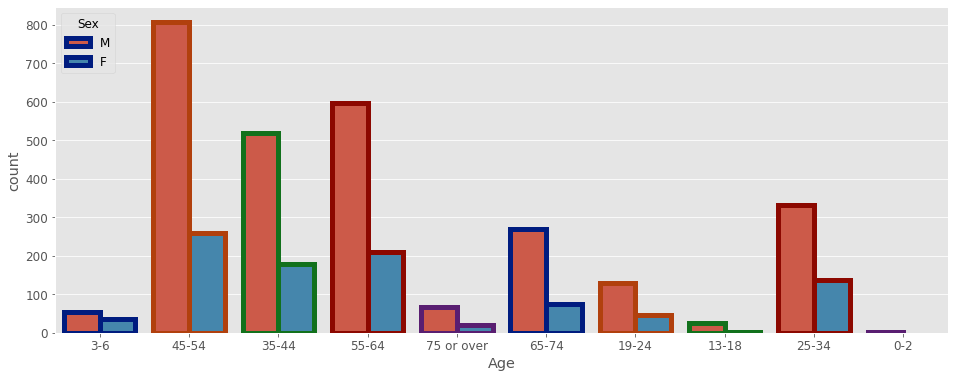

In [50]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Age",hue = "Sex" ,edgecolor=sns.color_palette("dark", 5),data=data,
                   linewidth=5,)
plt

## Effect of Drug on Age group 45-54(most commonly used by)


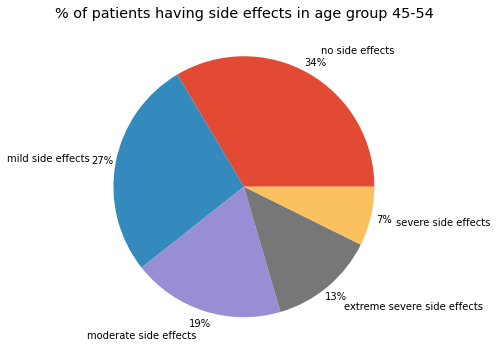

In [51]:
dt=data.loc[(data['Age']=="45-54")]
tr = pd.DataFrame(dt['Effectiveness'].value_counts())
tr_names = tr.index
count=tr['Effectiveness']

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of patients having side effects in age group 45-54')
plt.show()

## Label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex"]:
    data[col]=label.fit_transform(data[col])
    data_cpy[col]=label.fit_transform(data_cpy[col])
datastand=data

In [53]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Sex
0,4,4,5,no side effects,5,12,1
1,6,7,3,extreme severe side effects,1,0,1
2,6,0,5,no side effects,5,0,1
3,5,0,3,moderate side effects,2,0,1
4,7,0,3,moderate side effects,1,1,1


## Data splitting:

In [54]:
y=data['Effectiveness']
x=data.drop(['Effectiveness'],axis=1)
x1=x
x2=x

ycp=data_cpy['Effectiveness']
xcp=data_cpy.drop(['Effectiveness'],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)



xcp_train,xcp_test,ycp_train,ycp_test=train_test_split(xcp,ycp,random_state=42,test_size=0.1)

## Model Selection

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("accuracy is",accuracy_score(y_test,y_pred))
print("confusion matrix is",confusion_matrix(y_test,y_pred))

accuracy is 0.5411140583554377
confusion matrix is [[39  2 10  1  2]
 [ 7 47 16 24  1]
 [14 31 27  3  6]
 [ 2 17  4 90  2]
 [17  4  8  2  1]]


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_decision=decision.predict(x_test)

print("accuracy is",accuracy_score(y_test,y_decision))
print("confusion matrix is",confusion_matrix(y_test,y_decision))

accuracy is 0.519893899204244
confusion matrix is [[31  5 11  3  4]
 [ 4 43 18 26  4]
 [12 28 29  6  6]
 [ 2 21  5 86  1]
 [13  2  8  2  7]]


## Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
y_grad=grad.predict(x_test)

print("accuracy is",accuracy_score(y_test,y_grad))
print("confusion matrix is",confusion_matrix(y_test,y_grad))

accuracy is 0.6206896551724138
confusion matrix is [[45  1  4  1  3]
 [ 6 48 18 22  1]
 [13 18 45  1  4]
 [ 3 11  8 93  0]
 [15  1 12  1  3]]


In [63]:
from sklearn.svm import LinearSVC
support=LinearSVC()
support.fit(x_train,y_train)
y_support=support.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_support))
print("confusion matrix is",confusion_matrix(y_test,y_support))

accuracy is 0.5384615384615384
confusion matrix is [[ 50   0   1   3   0]
 [  7  30   7  51   0]
 [ 14  28  17  22   0]
 [  3   6   0 106   0]
 [ 16   2  12   2   0]]


## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train,y_train)
y_rand=rand.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_rand))
print("confusion matrix is",confusion_matrix(y_test,y_rand))

accuracy is 0.5464190981432361
confusion matrix is [[34  1 10  3  6]
 [ 5 45 18 24  3]
 [ 9 25 33  5  9]
 [ 3 14  7 90  1]
 [12  2 12  2  4]]
